# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Data Preparation and Exploration

In [2]:
df=pd.read_csv('exchange_rate.csv',parse_dates=True,index_col='date')

In [3]:
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [4]:
df.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


In [5]:
df.tail()

,Ex_rate
date,
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197
09-10-2010 00:00,0.720825
10-10-2010 00:00,0.720825


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

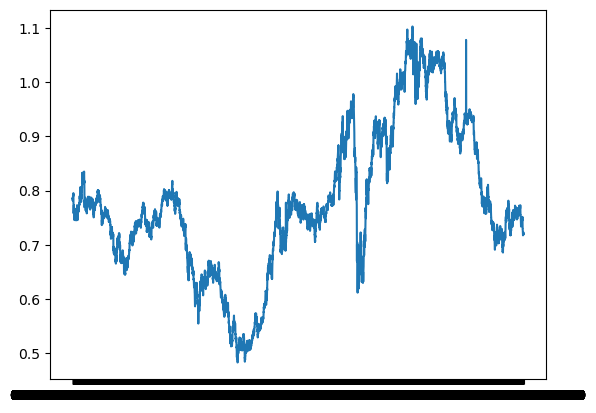

In [7]:
plt.plot(df)
plt.show()

In [8]:
result=seasonal_decompose(df['Ex_rate'],model='additive', period=12)

<Axes: xlabel='date'>

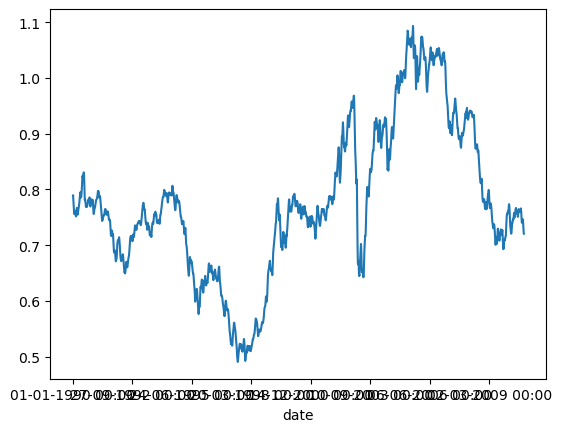

In [9]:
result.trend.plot()

<Axes: xlabel='date'>

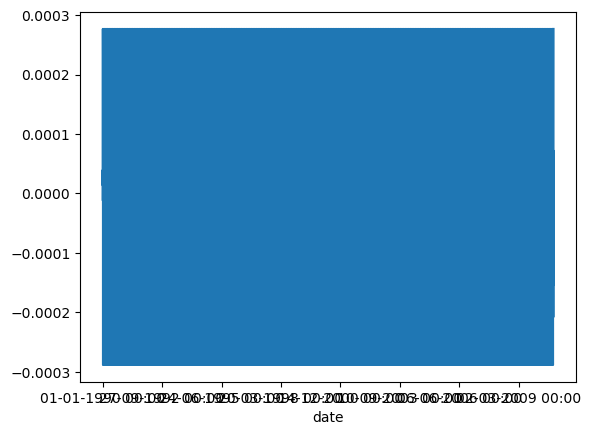

In [10]:
result.seasonal.plot()

<Axes: xlabel='date'>

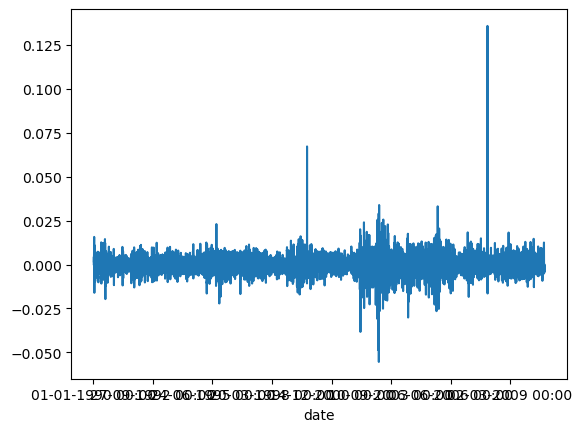

In [11]:
result.resid.plot()

# Part 2: Model Building - ARIMA

In [12]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.api as smt

In [13]:
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    original=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling mean')
    std=plt.plot(rolstd,color='green',label='Rolling std')
    plt.legend(loc='best')
    print('Results of Dickey-Fuller Test:\n')
    df_test=adfuller(timeseries)
    my_output=pd.Series(df_test[0:4],index=['Test statistic','p-value','#lags used','Number of observations used'])
    for i,j in df_test[4].items():
        my_output['Critical value(%s)'%i]=j
    print(my_output)

Results of Dickey-Fuller Test:

Test statistic                   -1.664994
p-value                           0.449233
#lags used                        1.000000
Number of observations used    7586.000000
Critical value(1%)               -3.431212
Critical value(5%)               -2.861921
Critical value(10%)              -2.566973
dtype: float64


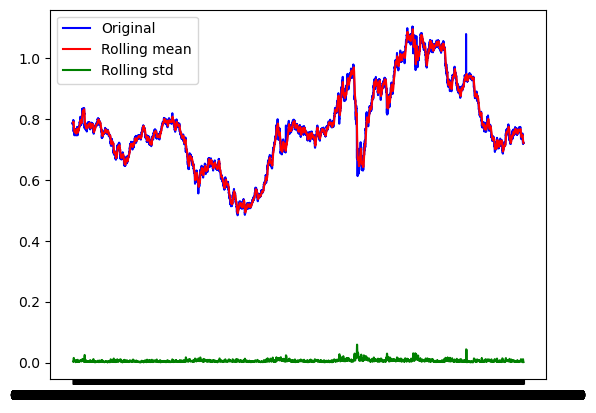

In [14]:
test_stationarity(df['Ex_rate'])

In [15]:
df['Ex_rate_diff']=df['Ex_rate']-df['Ex_rate'].shift(1)

In [16]:
df['Ex_rate_diff']

date
01-01-1990 00:00         NaN
02-01-1990 00:00   -0.003700
03-01-1990 00:00    0.004900
04-01-1990 00:00   -0.000700
05-01-1990 00:00   -0.001100
                      ...   
06-10-2010 00:00   -0.000207
07-10-2010 00:00    0.003345
08-10-2010 00:00    0.001358
09-10-2010 00:00   -0.002372
10-10-2010 00:00    0.000000
Name: Ex_rate_diff, Length: 7588, dtype: float64

In [17]:
df

,Ex_rate,Ex_rate_diff
date,,
01-01-1990 00:00,0.785500,NaN
02-01-1990 00:00,0.781800,-0.003700
03-01-1990 00:00,0.786700,0.004900
04-01-1990 00:00,0.786000,-0.000700
05-01-1990 00:00,0.784900,-0.001100
...,...,...
06-10-2010 00:00,0.718494,-0.000207
07-10-2010 00:00,0.721839,0.003345
08-10-2010 00:00,0.723197,0.001358


In [18]:
df.dropna(inplace=True)

In [19]:
df

,Ex_rate,Ex_rate_diff
date,,
02-01-1990 00:00,0.781800,-0.003700
03-01-1990 00:00,0.786700,0.004900
04-01-1990 00:00,0.786000,-0.000700
05-01-1990 00:00,0.784900,-0.001100
06-01-1990 00:00,0.786600,0.001700
...,...,...
06-10-2010 00:00,0.718494,-0.000207
07-10-2010 00:00,0.721839,0.003345
08-10-2010 00:00,0.723197,0.001358


Results of Dickey-Fuller Test:

Test statistic                  -99.393431
p-value                           0.000000
#lags used                        0.000000
Number of observations used    7586.000000
Critical value(1%)               -3.431212
Critical value(5%)               -2.861921
Critical value(10%)              -2.566973
dtype: float64


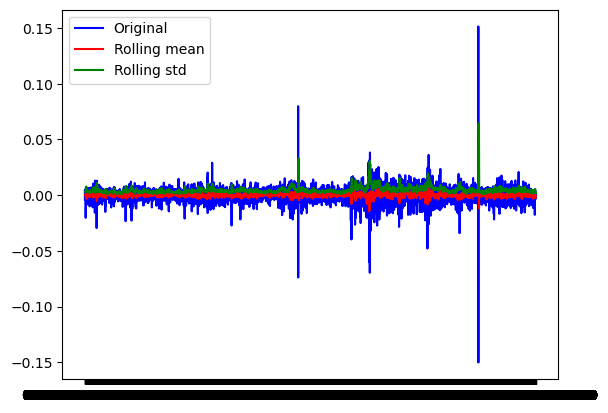

In [20]:
test_stationarity(df['Ex_rate_diff'])

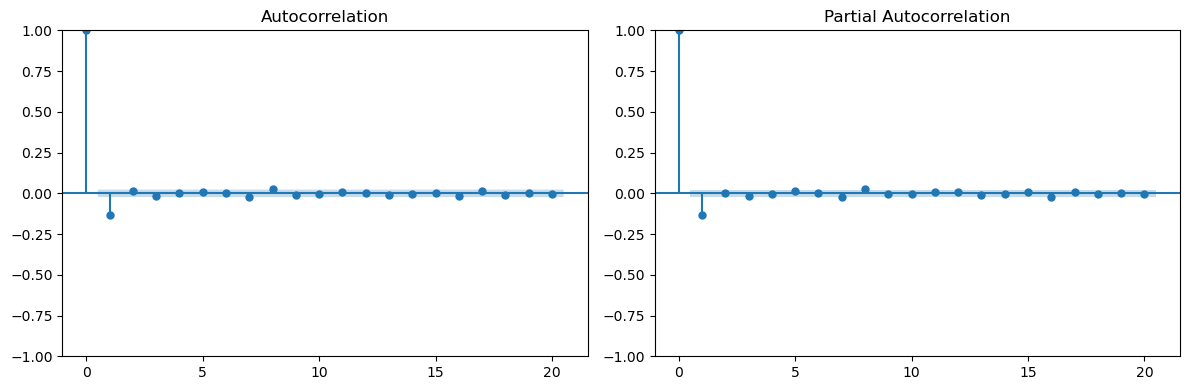

In [44]:
fig,axes=plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(df['Ex_rate_diff'],lags=20,ax=axes[0])
smt.graphics.plot_pacf(df['Ex_rate_diff'],lags=20,ax=axes[1])
plt.tight_layout()

In [149]:
import warnings
warnings.filterwarnings('ignore')
model=ARIMA(df['Ex_rate'],order=(1,1,1))

In [56]:
result1=model.fit()

In [78]:
result1.predict()

date
02-01-1990 00:00    0.000000
03-01-1990 00:00    0.781800
04-01-1990 00:00    0.786056
05-01-1990 00:00    0.786089
06-01-1990 00:00    0.785045
                      ...   
06-10-2010 00:00    0.718837
07-10-2010 00:00    0.718522
08-10-2010 00:00    0.721400
09-10-2010 00:00    0.723017
10-10-2010 00:00    0.721136
Name: predicted_mean, Length: 7587, dtype: float64

In [151]:
result1.forecast(7)

7587    0.720826
7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
Name: predicted_mean, dtype: float64

In [82]:
df['Predicted']=result1.predict()

<Axes: xlabel='date'>

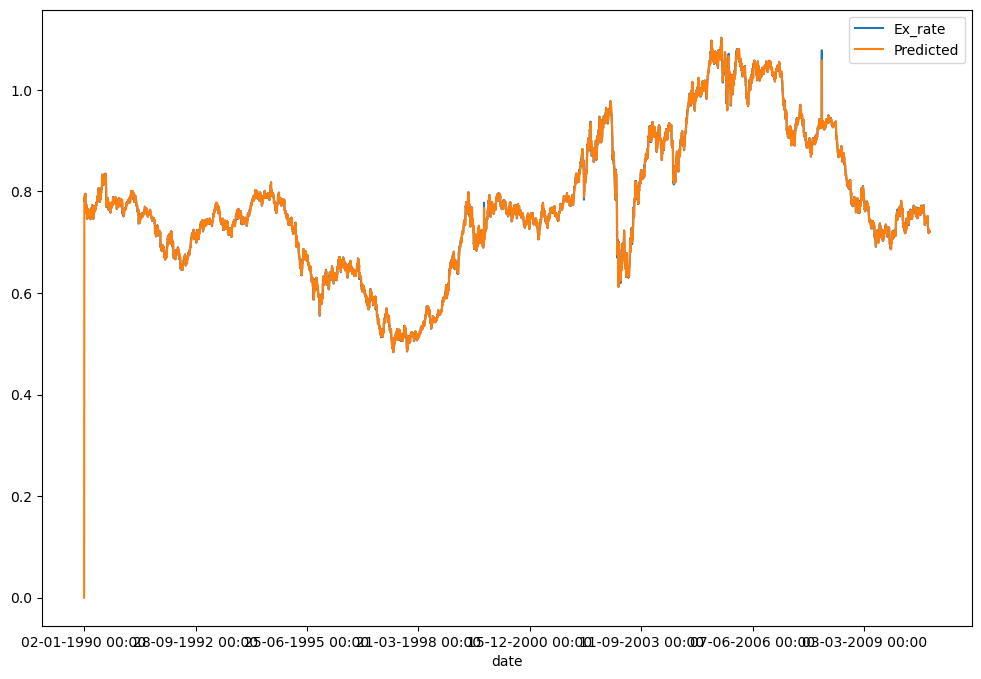

In [84]:
df[['Ex_rate','Predicted']].plot(figsize=(12,8))

In [88]:
df

,Ex_rate,Ex_rate_diff,predicted,Predicted
date,,,,
02-01-1990 00:00,0.781800,-0.003700,0.000000,0.000000
03-01-1990 00:00,0.786700,0.004900,0.781800,0.781800
04-01-1990 00:00,0.786000,-0.000700,0.786056,0.786056
05-01-1990 00:00,0.784900,-0.001100,0.786089,0.786089
06-01-1990 00:00,0.786600,0.001700,0.785045,0.785045
...,...,...,...,...
06-10-2010 00:00,0.718494,-0.000207,0.718837,0.718837
07-10-2010 00:00,0.721839,0.003345,0.718522,0.718522
08-10-2010 00:00,0.723197,0.001358,0.721400,0.721400


In [90]:
from sklearn.metrics import mean_absolute_error

In [92]:
mean_absolute_error(df['Ex_rate'],df['Predicted'])

0.00379546127226557

# Part 3: Model Building - Exponential Smoothing

In [96]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [153]:
simple=SimpleExpSmoothing(df['Ex_rate']).fit(smoothing_level=0.6)

In [102]:
simple_pred=simple.fittedvalues
simple_pred

date
02-01-1990 00:00    0.781800
03-01-1990 00:00    0.781800
04-01-1990 00:00    0.784740
05-01-1990 00:00    0.785496
06-01-1990 00:00    0.785138
                      ...   
06-10-2010 00:00    0.719032
07-10-2010 00:00    0.718709
08-10-2010 00:00    0.720587
09-10-2010 00:00    0.722153
10-10-2010 00:00    0.721356
Length: 7587, dtype: float64

In [155]:
simple_f=simple.forecast(7)
simple_f

7587    0.721037
7588    0.721037
7589    0.721037
7590    0.721037
7591    0.721037
7592    0.721037
7593    0.721037
dtype: float64

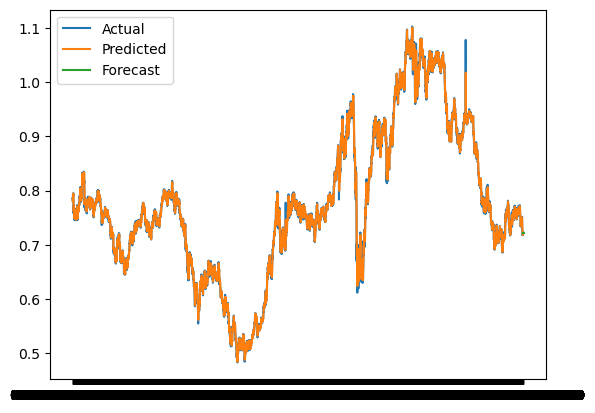

In [107]:
plt.plot(df['Ex_rate'],label='Actual')
plt.plot(simple_pred,label='Predicted')
plt.plot(simple_f,label='Forecast')
plt.legend()
plt.show()

In [157]:
double=ExponentialSmoothing(df['Ex_rate'],trend='additive').fit(smoothing_level=0.6,smoothing_trend=0.7)

In [115]:
double_trend=double.fittedvalues
double_trend

date
02-01-1990 00:00    0.783700
03-01-1990 00:00    0.783131
04-01-1990 00:00    0.787342
05-01-1990 00:00    0.788043
06-01-1990 00:00    0.786343
                      ...   
06-10-2010 00:00    0.719183
07-10-2010 00:00    0.718690
08-10-2010 00:00    0.721823
09-10-2010 00:00    0.724468
10-10-2010 00:00    0.722573
Length: 7587, dtype: float64

In [159]:
double_f=double.forecast(7)
double_f

7587    0.721080
7588    0.720637
7589    0.720193
7590    0.719750
7591    0.719306
7592    0.718863
7593    0.718419
dtype: float64

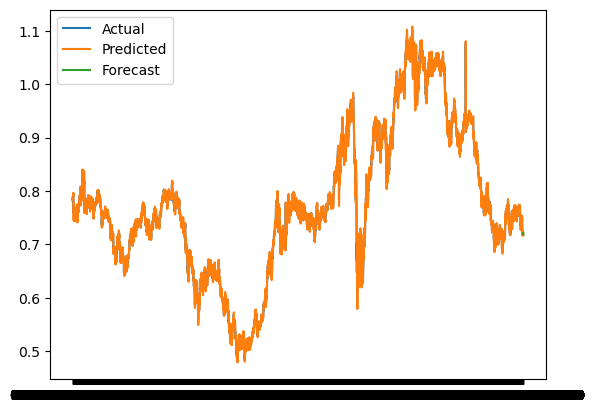

In [119]:
plt.plot(df['Ex_rate'],label='Actual')
plt.plot(double_trend,label='Predicted')
plt.plot(double_f,label='Forecast')
plt.legend()
plt.show()

# Part 4: Evaluation and Comparison

In [137]:
s_mean=mean_absolute_error(df['Ex_rate'],simple_pred)
s_mean

0.0040562366021842464

In [139]:
d_mean=mean_absolute_error(df['Ex_rate'],double_trend)
d_mean

0.0045545108282451455

In [141]:
s_mean=mean_squared_error(df['Ex_rate'],simple_pred)
s_mean

3.9124488644303196e-05

In [143]:
d_mean=mean_squared_error(df['Ex_rate'],double_trend)
d_mean

4.869838224676605e-05

In [145]:
s_mean=mean_absolute_percentage_error(df['Ex_rate'],simple_pred)
s_mean

0.005290251219071373

In [147]:
d_mean=mean_absolute_percentage_error(df['Ex_rate'],double_trend)
d_mean

0.005938132682590951